<center> <img src = https://avatars.mds.yandex.net/get-altay/753950/2a0000016092b9174319525f5aec8fb4cfd2/S_height alt="drawing" style="width:400px;">

# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

# <center> (статистические тесты в контексте EDA)

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Компании требуются ответы на следующие вопросы:

- Какие факторы влияют на зарплату специалиста Data Scientist.
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о занятости сотрудников и их работодателях.

***Данные содержат следующие столбцы:***

*work_year* - год, в котором была выплачена зарплата

*experience_level* - Опыт работы на этой должности в течение года с 4 возможными значениями: 
- EN — Entry-level/Junior
- MI — Mid-level/Intermediate
- SE — Senior-level/Expert
- EX — Executive-level/Director

*employment_type* -	Тип трудоустройства для этой роли:
- PT — неполный рабочий день
- FT — полный рабочий день
- CT — контракт
- FL — фриланс

*job_title* - Роль, в которой соискатель работал в течение года (в признаке представлены должности, связанные с Data Science)

*salary* - Общая выплаченная валовая сумма заработной платы

*salary_currency* -	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217

*salary_in_usd* - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com)

*employee_residence* -	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166

*remote_ratio* - Общий объём работы, выполняемой удалённо. Возможные значения:
- 0 — удалённой работы нет (менее 20 %)
- 50 — частично удалённая работа
- 100 — полностью удалённая работа (более 80 %)

*company_location* - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166

*company_size* - Среднее количество людей, работавших в компании в течение года:
- S — менее 50 сотрудников (небольшая компания);
- M — от 50 до 250 сотрудников (средняя компания);
- L — более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [138]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# делаем визуальную настройку всех графиков ноутбука (тему и палитру)
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [139]:
# загружаем датасет по ссылке
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1lB3hYym5qBWcN8N4NazxluBLd0GCzx6f', index_col=[0])
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [140]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


В датасете 607 записей (без пропущенных значений). Типы данных, представленных в признаках датасета, соответствуют содержанию представленных в них информации.

Проверим данные на наличие полных дубликатов:

In [142]:
data[data.duplicated()].shape[0]
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


В представленном датасете, по мнения автора исследования, неинформативными являются признаки 'salary', 'salary_currency', 'employee_residence'. Они подлежат удалению

In [143]:
to_delete = ['salary', 'salary_currency', 'employee_residence'] # список признаков, подлежащих удалению
data = data.drop(to_delete, axis=1)
data.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


**Исследование факторов, влиящих на зарплату специалиста Data Scientist**

***1. Влияние опыта работы на зарплату***

In [144]:
grouped = data.groupby('experience_level')['salary_in_usd'].median()

fig = px.bar(grouped,
             title='Зависимость зарплаты от опыта работы сотрудников',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Опыт работы сотрудников', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar.html")
fig.show()

Столбчатую диаграмму, отражающую взаимосвязь зарплаты и опыта работы DS-сотрудников ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1r0A4bKe2mO5gASUThUx4XUJpX51Nizil))

***Вывод:*** столбчатая диаграмм наглядно демонстрирует рост медианных зарплат по мере повышения опыта работы сотрудников 

***2. Влияние типа трудоустройства на зарплату***

In [145]:
grouped1 = data.groupby('employment_type')['salary_in_usd'].median()

fig = px.bar(grouped1,
             title='Зависимость зарплаты от типа трудоустройства сотрудников',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Тип трудоустройства', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar1.html")
fig.show()

Столбчатую диаграмму, отражающую зависимость зарплаты от типа трудоустройства DS-сотрудников ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1wdrdaLNmGdeuPKi-OXDusKXJ_uR2bkIT))

***Вывод:*** столбчатая диаграмм наглядно демонстрирует зависимость величины медианной зарплаты от типа трудоустройства - самые высокое вознаграждение труда у сотрудников, работающих целый день/по контракту

***3. Влияние удаленной занятости сотрудника на размер зарплаты***

In [146]:
mask = data[data['remote_ratio'] > 0] # устанавливаем значения удаленной занятости > 0
            
grouped2 = mask.groupby('remote_ratio')['salary_in_usd'].median()

fig = px.bar(grouped2,
             title='Зависимость зарплаты от удаленной занятости',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='remote_ratio', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar2.html")
fig.show()

Столбчатую диаграмму, отражающую зависимость зарплаты DS-сотрудников от удаленной занятости ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1EVNjZyocVfVqv4FxMG2_ia2Tnvf_nyXh))  

***Вывод:*** график наглядно демонстрирует более высокий уровень медианной зарплаты в случае отсутствия удаленной занятости

***4. Влияние страны работодателя на размер зарплаты на DS-должностях***

In [147]:
# Посмотрим на графике распределение медианных зарплат в странах

grouped3 = data.groupby('company_location')['salary_in_usd'].median() 

fig = px.histogram(grouped3, 
                   title='Распределение уровня медианной зарплаты', 
                   width=800,
                   height=600)
fig.update_layout(xaxis_title='Медианная зарплата в долларах США', yaxis_title='Страна работодателя')
fig.write_html('images/hist_box.htm')
fig.show()


Гистограмму, демонстрирующую распределение уровня зарплаты DS-сотрудников ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1-2AEYy1xRUx-9zL1wW_ZCxm4UiIxW3Be))

***Вывод:*** для более удобной визуализации стран-лидеров по уровню з/п следует сосредоточиться на зарплатах выше 100 тыс. долл. в год

In [148]:
# произведем отбор стран для их удобной визуализации по уровню з/п в DS

grouped4 = data.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).iloc[:7] # отбираем первые 7 стран-лидеров по медианной з/п в долл США (>=100 тыс. долл. США в год)
grouped4


company_location
RU    157500.0
US    135000.0
NZ    125000.0
IL    119059.0
AE    115000.0
DZ    100000.0
IQ    100000.0
Name: salary_in_usd, dtype: float64

In [149]:
dct = grouped4.to_dict() # преобразуем таблицу в словарь
top7 = list(dct.keys()) # формируем список из кодов стран-лидеров по уровню з/п в DS
top7

['RU', 'US', 'NZ', 'IL', 'AE', 'DZ', 'IQ']

In [150]:
# создадим новый признак 'company_location1' для удобного анализа стран по уровню медианных зарплат в DS

data['company_location1'] = data['company_location'].apply(lambda x: 'others' if x not in top7 else x) # страна, не входящая в top7, именуется 'others'


In [151]:
# строим столбчатую диаграмму для определения стран-лидеров по уровню медианных зарплат в DS

grouped5 = data.groupby('company_location1')['salary_in_usd'].median()

fig = px.bar(grouped5,
             title='Зависимость зарплаты от страны работодателя',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='company_location1', yaxis_title='Медианная зарплата в долларах США')
fig.write_html("images/bar3.html")
fig.show()

Столбчатую диаграмму, демонстрирующую зависимость зарплаты DS-сотрудников от страны работодателя ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1eQ_amS5acgKOFm-YUn6bwDr0Fuusz4sz))

***Вывод:*** после введения уровня медианной зарплаты выше 100 тыс. долл. США в год, на первый план вышли 7 стран, лидерами среди которых являются Россия, США и Новая Зеландия. Таким образом, именно в этих странах базируются компании, предлагающие своим DS-сотрудникам наиболее привлекательные вознаграждения за труд.

## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

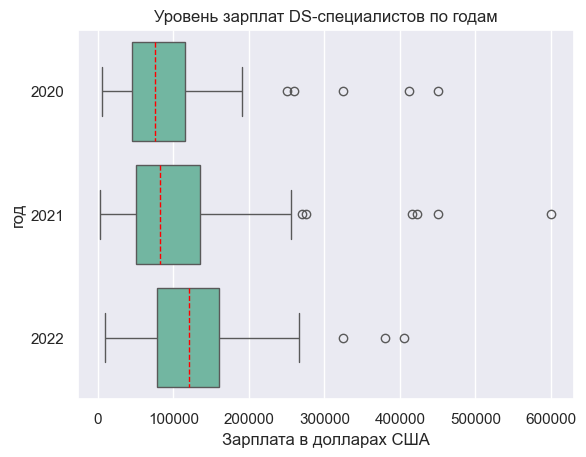

In [152]:
# Построим коробчатую диаграмму, демонстрирующую уровень зарплат DS-специалистов по годам

ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='год')
plt.title('Уровень зарплат DS-специалистов по годам')
plt.show()

In [153]:
grouped6 = data.groupby('work_year')['salary_in_usd'].median()

fig = px.bar(grouped6,
             title='Уровень медианной зарплаты на DS-позициях по годам',
             opacity = 0.8,
             height=600,
             width=800
            )
fig.update_layout(xaxis_title='Медианная зарплата в долларах США', yaxis_title='work_year')
fig.write_html("images/bar4.html")
fig.show()

Столбчатую диаграмму, демонстрирующую уровень медианных зарплат DS-сотрудников в 2020-2022 гг ([можно посмотреть здесь](https://drive.google.com/uc?export=download&id=1OB1ghcJzTt-_jPBvRfUmOR_HMiLwhkqP))

In [154]:
# посмотрим статистику по з/п по годам

data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата DS-специалистов по годам')
data_agg

Зарплата DS-специалистов по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


***Вывод:*** На первый взгляд, с каждым годом рост наблюдается увеличение роста зарплат DS-специалистов. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

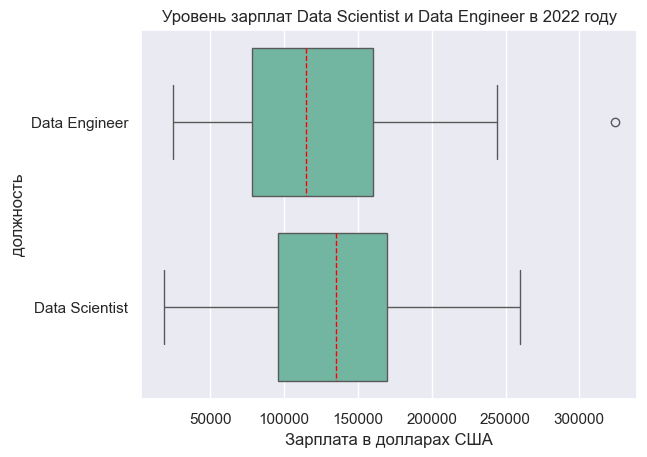

In [155]:
mask = data[((data['work_year'] == 2022) & (data['job_title'] == 'Data Scientist')) | ((data['work_year'] == 2022) & (data['job_title'] == 'Data Engineer'))] # формируем маску

ax = sns.boxplot(mask, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='должность')
plt.title('Уровень зарплат Data Scientist и Data Engineer в 2022 году')
plt.show()

In [156]:
# посмотрим статистику по з/п Data Scientist и Data Engineer в 2022 году

data_agg = mask.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Статистика по зарплатам Data Scientist и Data Engineer в 2022 году')
data_agg

Статистика по зарплатам Data Scientist и Data Engineer в 2022 году


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


***Вывод:*** На первый взгляд, в 2022 году зарплаты специалистов Data Scientist незначительно, но превышали вознаграждение труда Data Engineer. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

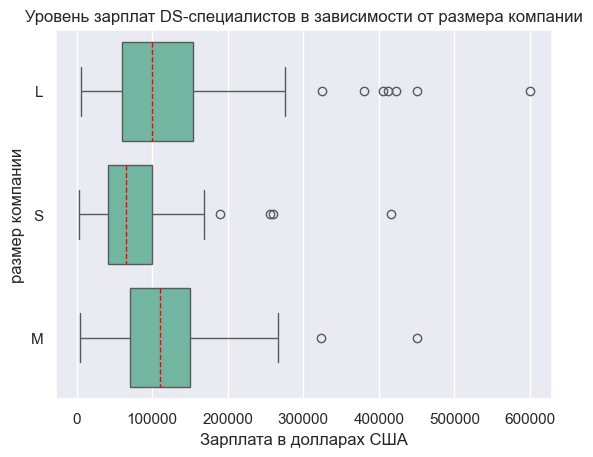

In [157]:
# Построим коробчатую диаграмму, демонстрирующую уровень зарплат DS-специалистов по годам

ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='размер компании')
plt.title('Уровень зарплат DS-специалистов в зависимости от размера компании')
plt.show()

In [158]:
# посмотрим статистику по з/п DS-специалистов в зависимости от размера компании

data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Статистика по зарплатам DS-специалистов в зависимости от размера компании')
data_agg

Статистика по зарплатам DS-специалистов в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0


***Вывод:*** Согласно полученным данным, оплата труда DS-специалистов в компаниях разной величины отличается, причем специалисты в крупных и средних компаниях имеют значительно более высокий и примерно равный уровень зарплат. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании

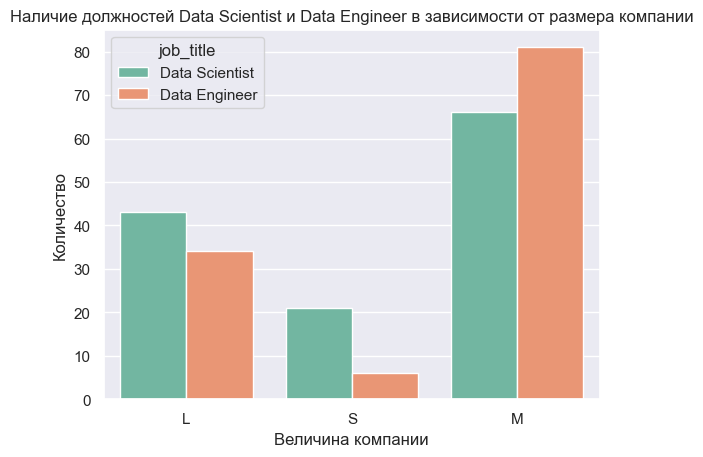

In [159]:
mask = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')] # формируем маску

ax = sns.countplot(data=mask, x=data['company_size'], hue='job_title')
ax.set(xlabel='Величина компании', ylabel='Количество')
plt.title('Наличие должностей Data Scientist и Data Engineer в зависимости от размера компании')
plt.show()

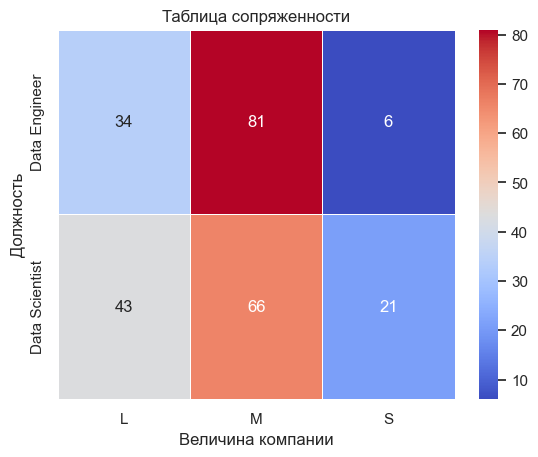

In [160]:
cross_tab = pd.crosstab(index=mask['job_title'], columns=mask['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Величина компании', ylabel='Должность')
plt.title('Таблица сопряженности')
plt.show()

***Вывод:*** графики дают четкое представление о том, что возможное наличие в компании должностей Data Scientist и Data Engineer увязывяется с ее размером. Причем наибольшее сосредоточение рассматриваемых должностей характерно именно для компаний средних размеров, а не для крупных. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных

In [161]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

### 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist??

**Изучим соответствующие выборки**

In [162]:
salary2020 = data[data['work_year']==2020]['salary_in_usd'].squeeze().to_frame(name=2020) # значения зарплаты DS-специалистов в 2020 г
salary2021 = data[data['work_year']==2021]['salary_in_usd'].squeeze().to_frame(name=2021) # значения зарплаты DS-специалистов в 2021 г
salary2022 = data[data['work_year']==2022]['salary_in_usd'].squeeze().to_frame(name=2022) # значения зарплаты DS-специалистов в 2022 г
salary2020.shape[0], salary2021.shape[0], salary2022.shape[0] # определение длины выборок

(72, 215, 278)

***Вывод:*** выборки разновеликие, следовательно, для их сравнения в статистических тестах предлагается по мере необходимости приводить их к единой длине за счет заполнения пропусков медианными значениями 

**1 этап. Сравнение показателей 2020 и 2021 гг**

In [163]:
df20_21 = pd.concat([salary2020, salary2021], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df20_21 = df20_21.drop('index', axis=1)
median2020 = df20_21[2020].median() # устанавливаем медианное значение в признаке
median2021 = df20_21[2021].median()
df20_21[2020].fillna(median2020, inplace=True) 
df20_21[2021].fillna(median2021, inplace=True)
df20_21

,2020,2021
0,79833.0,82528.0
1,260000.0,82528.0
2,109024.0,82528.0
3,20000.0,82528.0
4,150000.0,82528.0
...,...,...
282,75544.0,69999.0
283,75544.0,94665.0
284,75544.0,102839.0
285,75544.0,109000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п в 2020 г (m1) больше или равна з/п в 2021 г (m2): m1>=m2


*Альтернативная гипотеза*: з/п в 2020 г (m1) меньше з/п в 2021 г (m2): m1<m2



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [164]:
# проводим тест Шапиро-Уилка
print('Для 2020 г:')
result = stats.shapiro(df20_21[2020])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для 2021 г:')
result = stats.shapiro(df20_21[2021])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для 2020 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Критерий Уилкоксона.

**Проведём тест**

In [165]:
# проводим тест
_, p = stats.wilcoxon(df20_21[2020], df20_21[2021], alternative = 'less')
decision_hypothesis(p)


p-value = 0.003
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2021 году наблюдался рост зарплат DS-специалистов по сравнению с предыдущим 2020 годом

***2 этап. Сравнение показателей 2021 и 2022 гг***

In [166]:
df21_22 = pd.concat([salary2021, salary2022], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df21_22 = df21_22.drop('index', axis=1)
median2021 = df21_22[2021].median() # устанавливаем медианное значение в признаке
median2022 = df21_22[2022].median()
df21_22[2021].fillna(median2021, inplace=True) 
df21_22[2022].fillna(median2022, inplace=True)
df21_22

,2021,2022
0,82528.0,120000.0
1,150000.0,120000.0
2,235000.0,120000.0
3,53192.0,120000.0
4,100000.0,120000.0
...,...,...
488,82528.0,154000.0
489,82528.0,126000.0
490,82528.0,129000.0
491,82528.0,150000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п в 2021 г (m1) больше или равна з/п в 2022 г (m2): m1>=m2


*Альтернативная гипотеза*: з/п в 2021 г (m1) меньше з/п в 2022 г (m2): m1<m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [167]:
# проводим тест Шапиро-Уилка
print('Для 2021 г:')
result = stats.shapiro(df21_22[2021])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для 2022 г:')
result = stats.shapiro(df21_22[2022])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для 2021 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2022 г:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Критерий Уилкоксона.

**Проведём тест**

In [168]:
# проводим тест
_, p = stats.wilcoxon(df21_22[2021], df21_22[2022], alternative = 'less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2022 году наблюдался рост зарплат DS-специалистов по сравнению с предыдущим 2021 годом. Следовательно, с 2020 по 2022 гг их зарплаты ежегодно росли.

## 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Изучим две выборки**

In [169]:
df = data[data['work_year'] == 2022]
ds = df[df['job_title'] == 'Data Scientist']['salary_in_usd'].squeeze().to_frame(name='ds') # з/п Data Scientist в 2022 г
de = df[df['job_title'] == 'Data Engineer']['salary_in_usd'].squeeze().to_frame(name='de') # з/п Data Engineer в 2022 г
ds.shape[0], de.shape[0]

(65, 79)

***Вывод:*** так как полученные выборки разновеликие, для их сравнения в статистических тестах приведем их к единой длине за счет заполнения пропусков медианными значениями 

In [170]:
df = pd.concat([ds, de], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df = df.drop('index', axis=1)
median_ds = df['ds'].median() # устанавливаем медианное значение в признаке
median_de = df['de'].median()
df['ds'].fillna(median_ds, inplace=True) 
df['de'].fillna(median_de, inplace=True)
df

,ds,de
0,130000.0,115000.0
1,90000.0,115000.0
2,136620.0,115000.0
3,99360.0,115000.0
4,117789.0,115000.0
...,...,...
139,135000.0,25000.0
140,135000.0,220110.0
141,135000.0,160080.0
142,135000.0,154000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS в 2022 г (m1) меньше или равны з/п DE (m2): m1<=m2


*Альтернативная гипотеза*: з/п DS в 2022 г (m1) больше з/п DE (m2): m1>m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [171]:
# проводим тест Шапиро-Уилка
print('Для ds')
result = stats.shapiro(df['ds'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для de')
result = stats.shapiro(df['de'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для ds
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для de
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [172]:
# проводим тест
_, p = stats.mannwhitneyu(df['ds'], df['de'], alternative = 'greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** в 2022 году зарплаты Data Scientist превышали размер вознаграждения труда Data Engineer.

## 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Изучим необходимые выборки**

In [173]:
small = data[data['company_size'] == 'S']['salary_in_usd'].squeeze().to_frame(name='s') # з/п DS-специалистов в маленьких компаниях
medium = data[data['company_size'] == 'M']['salary_in_usd'].squeeze().to_frame(name='m') # з/п DS-специалистов в компаниях среднего размера
large = data[data['company_size'] == 'L']['salary_in_usd'].squeeze().to_frame(name='l') # з/п DS-специалистов в крупных компаниях 
small.shape[0], medium.shape[0], large.shape[0]

(82, 290, 193)

***Вывод:*** так как полученные выборки разновеликие, для их сравнения в статистических тестах приведем их к единой длине за счет заполнения пропусков медианными значениями. 

Разделим проведение статистических тестов на 2 этапа для поочередного выявления соотношения зарплат в компаниях разных размеров


**1 этап. Сравнение зарплат в маленьких компаниях и компаниях среднего размера**

In [174]:
df_s_m = pd.concat([small, medium], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df_s_m = df_s_m.drop('index', axis=1)
median_s = df_s_m['s'].median() # устанавливаем медианное значение в признаке
median_m = df_s_m['m'].median()
df_s_m['s'].fillna(median_s, inplace=True) 
df_s_m['m'].fillna(median_m, inplace=True)
df_s_m

,s,m
0,260000.0,109640.0
1,20000.0,109640.0
2,190000.0,109640.0
3,125000.0,109640.0
4,51321.0,109640.0
...,...,...
367,65511.0,52000.0
368,65511.0,154000.0
369,65511.0,126000.0
370,65511.0,129000.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS-специалистов в маленьких компаниях (m1) больше или равна з/п в более крупных компаниях (m2): m1>=m2


*Альтернативная гипотеза*: з/п DS-специалистов в маленьких компаниях (m1) меньше з/п в более крупных компаниях (m2): m1<m2


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [175]:
# проводим тест Шапиро-Уилка
print('Для маленьких компаний:')
result = stats.shapiro(df_s_m['s'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для средних компаний')
result = stats.shapiro(df_s_m['m'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для маленьких компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для средних компаний
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [176]:
# проводим тест
_, p = stats.mannwhitneyu(df_s_m['s'], df_s_m['m'], alternative = 'less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Вывод:*** з/п DS-специалистов в маленьких компаниях меньше их з/п в компаниях среднего размера

**2 этап. Сравнение зарплат в компаниях среднего размера и крупных компаниях**

In [177]:
df_m_l = pd.concat([medium, large], axis=1).reset_index() # объединяем 2 выборки для выравнивания длин
df_m_l = df_m_l.drop('index', axis=1)
median_m = df_m_l['m'].median() # устанавливаем медианное значение в признаке
median_l = df_m_l['l'].median()
df_m_l['m'].fillna(median_m, inplace=True) 
df_m_l['l'].fillna(median_l, inplace=True)
df_m_l

,m,l
0,109024.0,100000.0
1,39916.0,100000.0
2,5707.0,100000.0
3,56000.0,100000.0
4,43331.0,100000.0
...,...,...
478,109640.0,405000.0
479,109640.0,135000.0
480,109640.0,177000.0
481,109640.0,205300.0


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: з/п DS-специалистов в компаниях среднего размера (m1) больше или равна з/п в крупных компаниях (m2): m1>=m2


*Альтернативная гипотеза*: з/п DS-специалистов в компаниях среднего размера (m1) меньше з/п в крупных компаниях (m2): m1<m2

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально. Гипотеза теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [178]:
# проводим тест Шапиро-Уилка
print('Для компаний средней величины:')
result = stats.shapiro(df_m_l['m'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

print('Для крупных компаний')
result = stats.shapiro(df_m_l['l'])
decision_normality(result[1]) # функция возвращает статистику, рассчитанную тестом[0], и p-значение[1].

Для компаний средней величины:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для крупных компаний
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата в долларах США»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [179]:
# проводим тест
_, p = stats.mannwhitneyu(df_m_l['m'], df_m_l['l'], alternative = 'less')
decision_hypothesis(p)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


***Вывод:*** з/п DS-специалистов в компаниях среднего размера больше или равна их з/п в крупных компаниях. Следовательно, меньше всего получают специалисты в маленьких компаниях.

## 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [180]:
mask = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')] # формируем маску

# вычисляем таблицу сопряжённости
# составляем таблицу сопряжённости
cross_table = pd.crosstab(mask['job_title'], mask['company_size'])

cross_table


company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [181]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**: существует статистически значимая взаимосвязь между наличием в компании должностей Data Scientist и Data Engineer и ее размером.

## Итоговые результаты исследования

Во всех четырех случаях выводы по итогам проведения статистических тестов подтвердили информацию, полученную в ходе визуализации и первичных статистических исследований, а именно: 

*   С 2020 по 2022 гг зарплаты DS-специалистов ежегодно росли;
*   В 2022 году зарплаты Data Scientist превышали размер вознаграждения труда Data Engineer;
*   Меньше всего получают DS-специалисты в маленьких компаниях, а больше всего - в компаниях среднего размера и более крупных;
*   Существует статистически значимая взаимосвязь между наличием в компании должностей Data Scientist и Data Engineer и ее размером.